# Deep Hedging AI
### Vanilla Deep Hedging engine reference implementation with dynamic training update.

This is the main example notebook. It shows learning to hedge a vanilla call option (ATM by default), first in a Black & Scholes world with statistical drift, and secondly in a world where a second option can be traded.
The examples are not intended to be overly realistic.

In the Black & Scholes case we see that the hedge learned is _not_ the risk-neutral hedge. The notebook <tt>trainer-bs_nodrift.ipynb</tt> demonstrates that if the statistical drift is zero, and step size is sufficiently small (daily), then the Deep Hedging hedge approximates the risk-neutral hedge.

### Hans Buehler, June 30 2022


In [1]:
""" Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
#!pip -q install cdxbasics "tensorflow>=2.11" "tensorflow_probability==0.19"
import os
p = os.getcwd()
dhn = "/deephedging/"
i = p.find(dhn)
my_path = None
if i!=-1:
    my_path = p[:i]
    import sys
    sys.path.append(my_path)
    print("SageMaker: added python path %s" % my_path)
else:
    print(sys.path)

SageMaker: added python path /home/ec2-user/SageMaker


Deep Hedging AI says hello ... Tensorflow version 2.11.0 running on 1 CPUs and 0 GPUs


2023-03-25 18:31:59.016658: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Deep Hedging in a Black \& Scholes World

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Initializing training at 2023-03-25 18:32:05: gym with 944 trainable weights compiled. Took 4s
Agent is using 942 weights: 941 for the main agent per step, 1 for initial delta.
 Features available per time step:     action, cost, delta, ivol, lbnd_a, pnl, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used per time step:          delta, price and time_left
 Features available for initial delta: cost, ivol, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used by initial delta:       -
Monetary utility cvar@1 is using 1 weight
 Features available: cost, ivol, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used:      -
Caching enabled @ '/home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/e71b93472d25862d86eadaa6b385f17443f9dc0b1c837625.pck'
Cache successfully loaded. Current epoch: 800
Nothing to do: cached model loaded from /home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/e71b93472d25862d86eadaa6b385f17

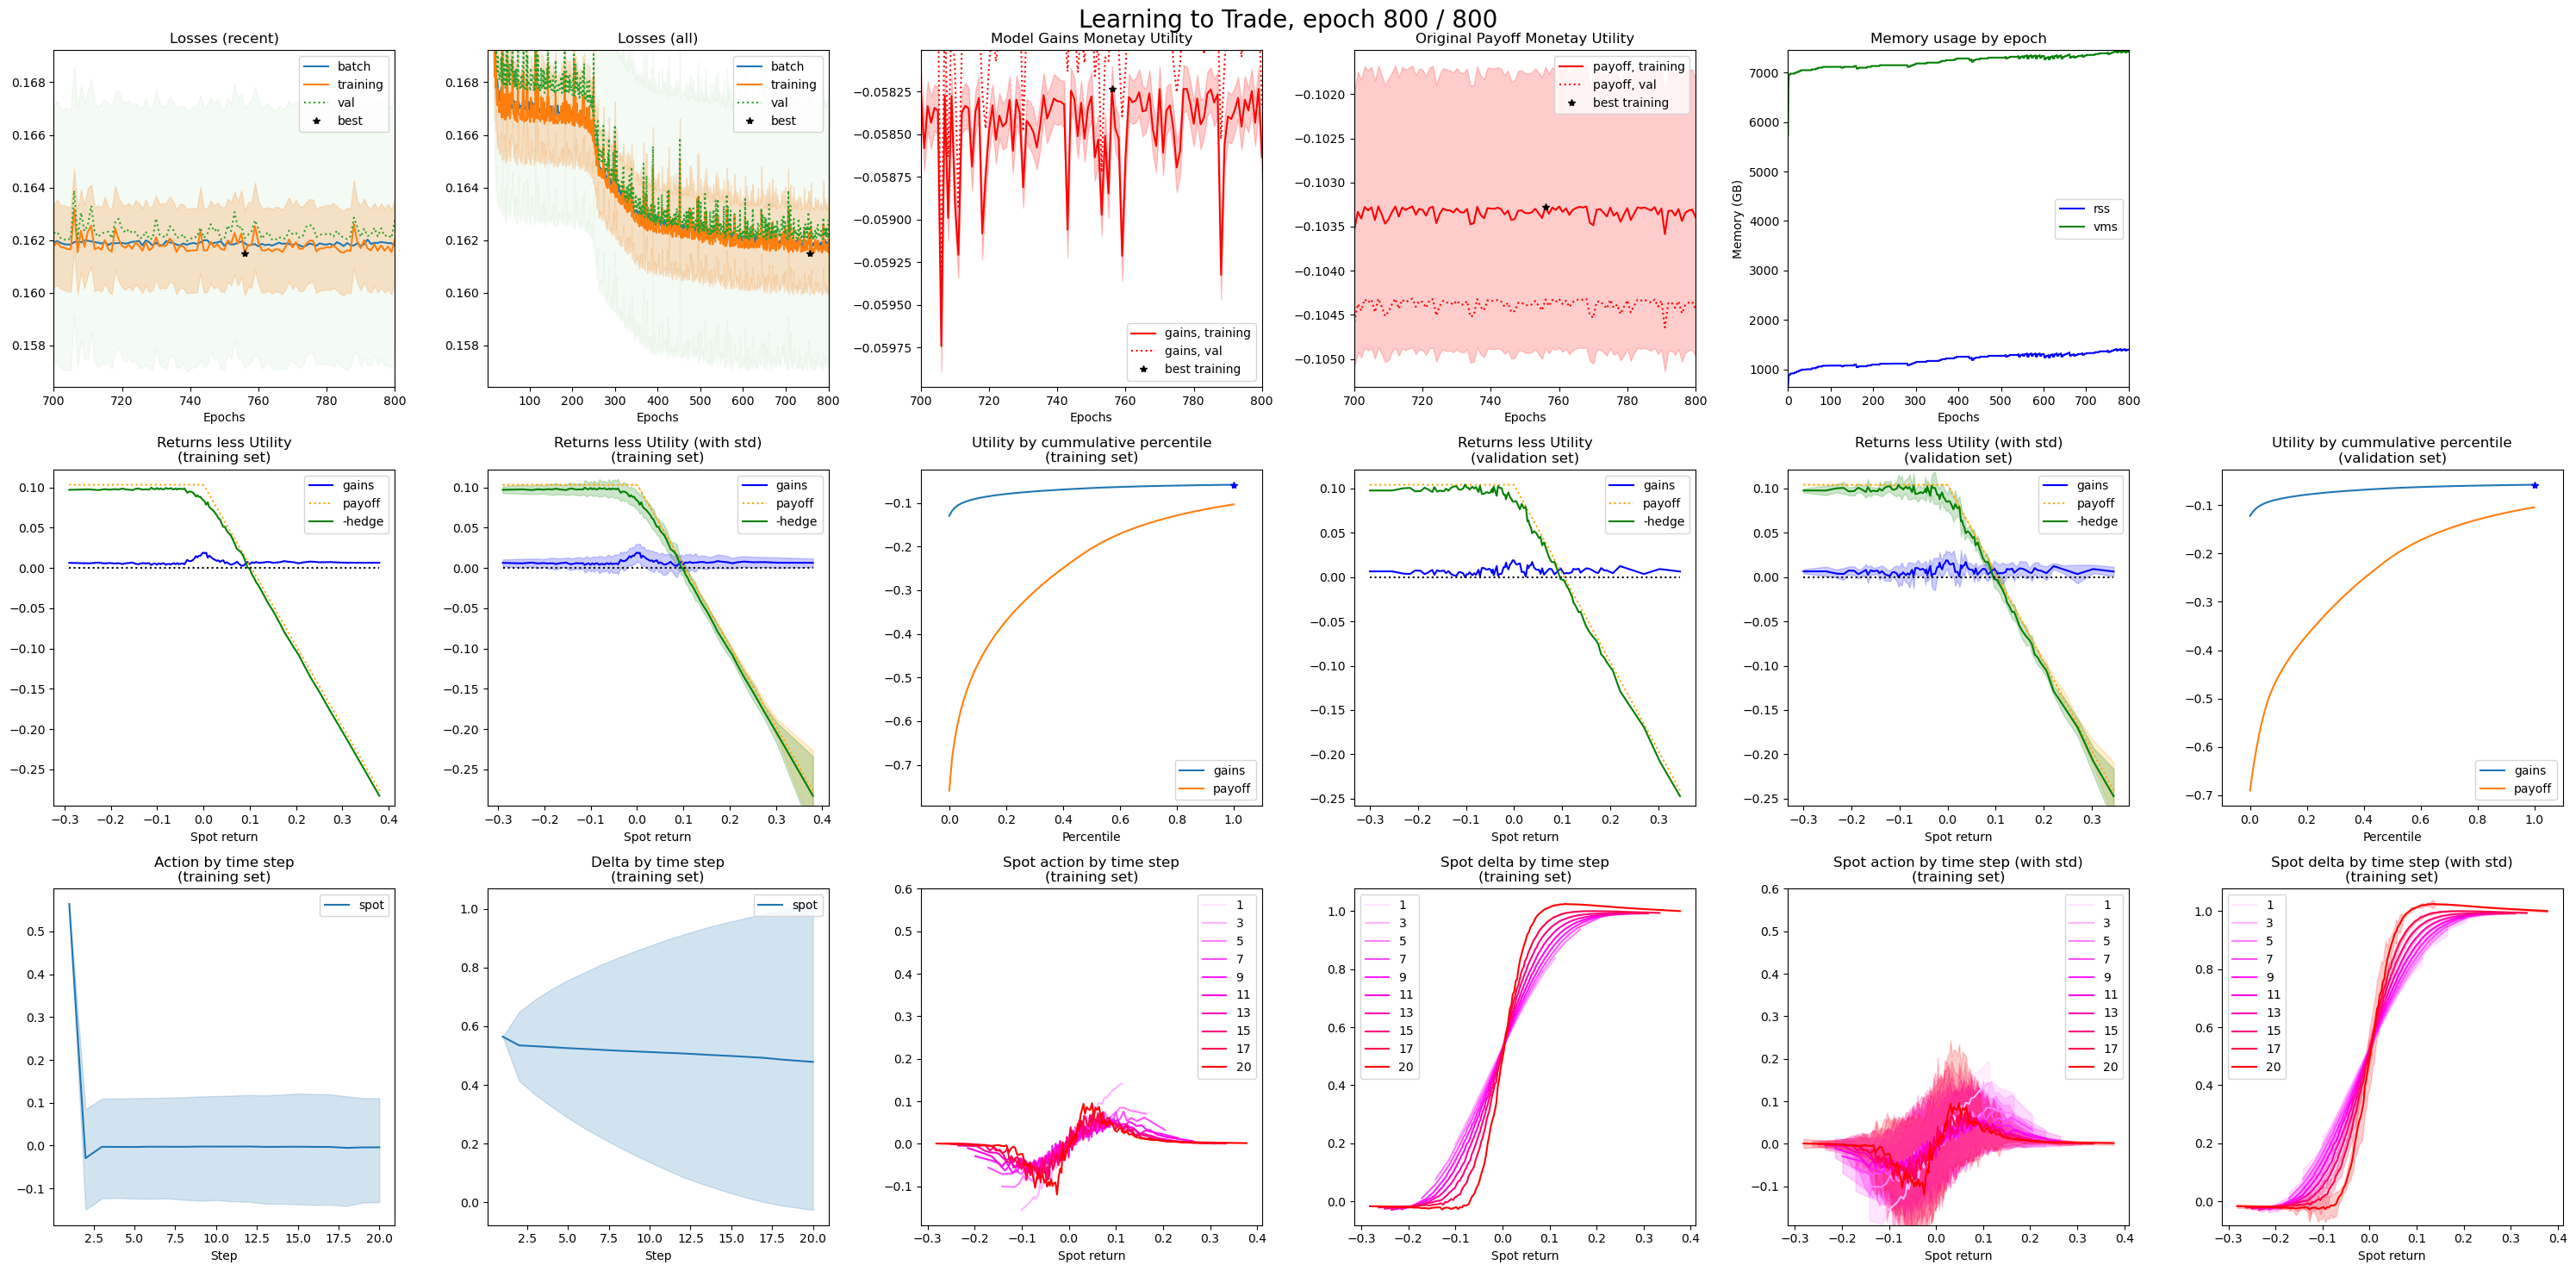

Training 800/800 epochs; 944 weights; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.454853 (0.00416191), training 0.162028 (0.00156194), best 0.161511 (0.00416191), batch 0.161794, val 0.162766 (0.00482568); best epoch 756, last cached 800 | memory used: rss 1401.97M, vms 7421.13M | time elapsed 2:30:20; time per epoch 11s; estimated time remaining 0s | current time: 2023-03-25 18:32:11                        
 Status: Cached model already sufficiently trained.
 Weights set to best epoch: 756
 State of training until epoch 800 cached into /home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/e71b93472d25862d86eadaa6b385f17443f9dc0b1c837625.pck
 Time: 2023-03-25 18:32:15
Training terminated. Total time taken 9s
Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions'])
Config usage report
config.gym.agent.init_delta.network['activation'] = relu # Network activation function; de

In [2]:
print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
# gym
config.gym.objective.utility = "cvar"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.optimizer.name = "adam"
#config.trainer.train.optimizer.learning_rate = 0.001
#config.trainer.train.optimizer.clipvalue = 1.
#config.trainer.train.optimizer.global_clipnorm = 1.
config.trainer.train.batch_size = None
config.trainer.train.epochs = 800
config.trainer.caching.mode = "on"
config.trainer.visual.epoch_refresh = 5
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in a Black \& Scholes World"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=world.nSamples//10)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()

#### Comparison to Black & Scholes

See also notebooks/blackscholes for other notebooks. Note that we use medium risk aversion, hence the hedge is not expected to match the risk-neutral hedge. See the sub directory <tt>blackscholes</tt> for experiments approximating the black & scholes solution

Running strategies ...done
Running tensorflow to compute utility of BS strategy ...done; result -0.0516349
Rendering now. Stand by.


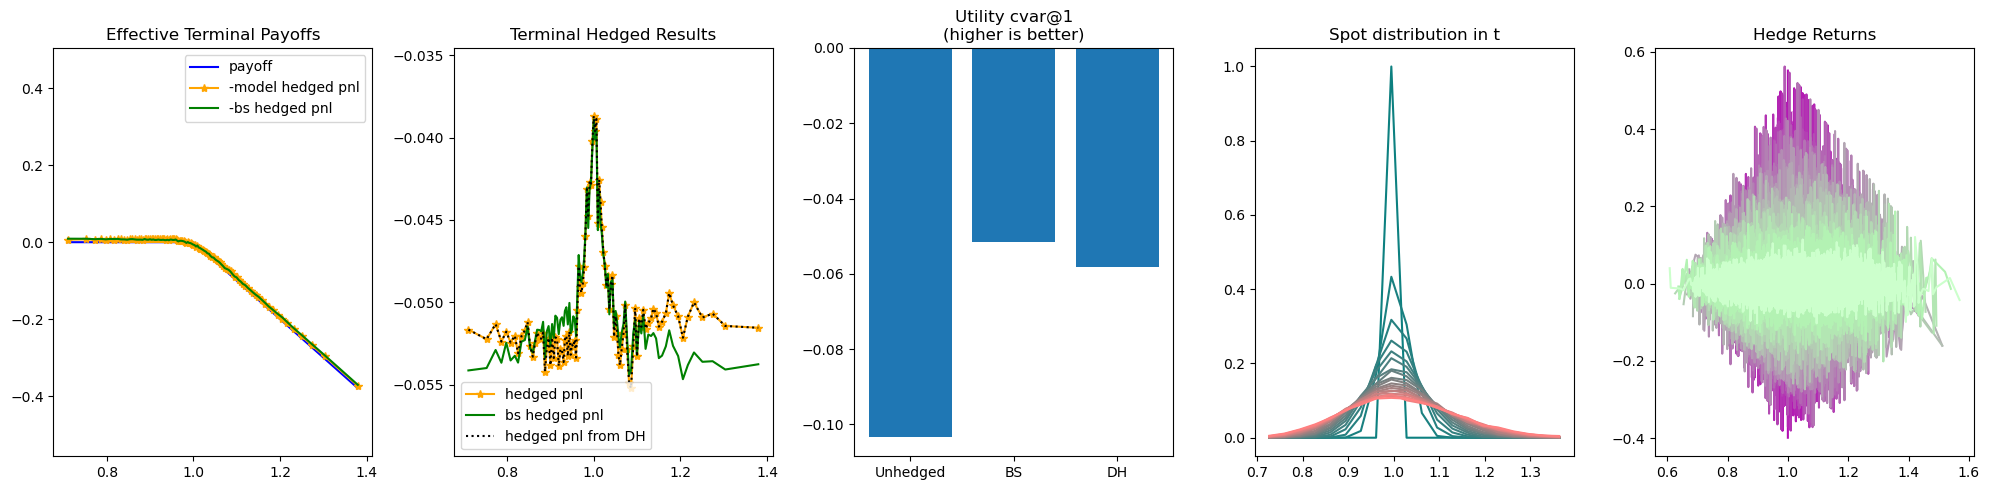

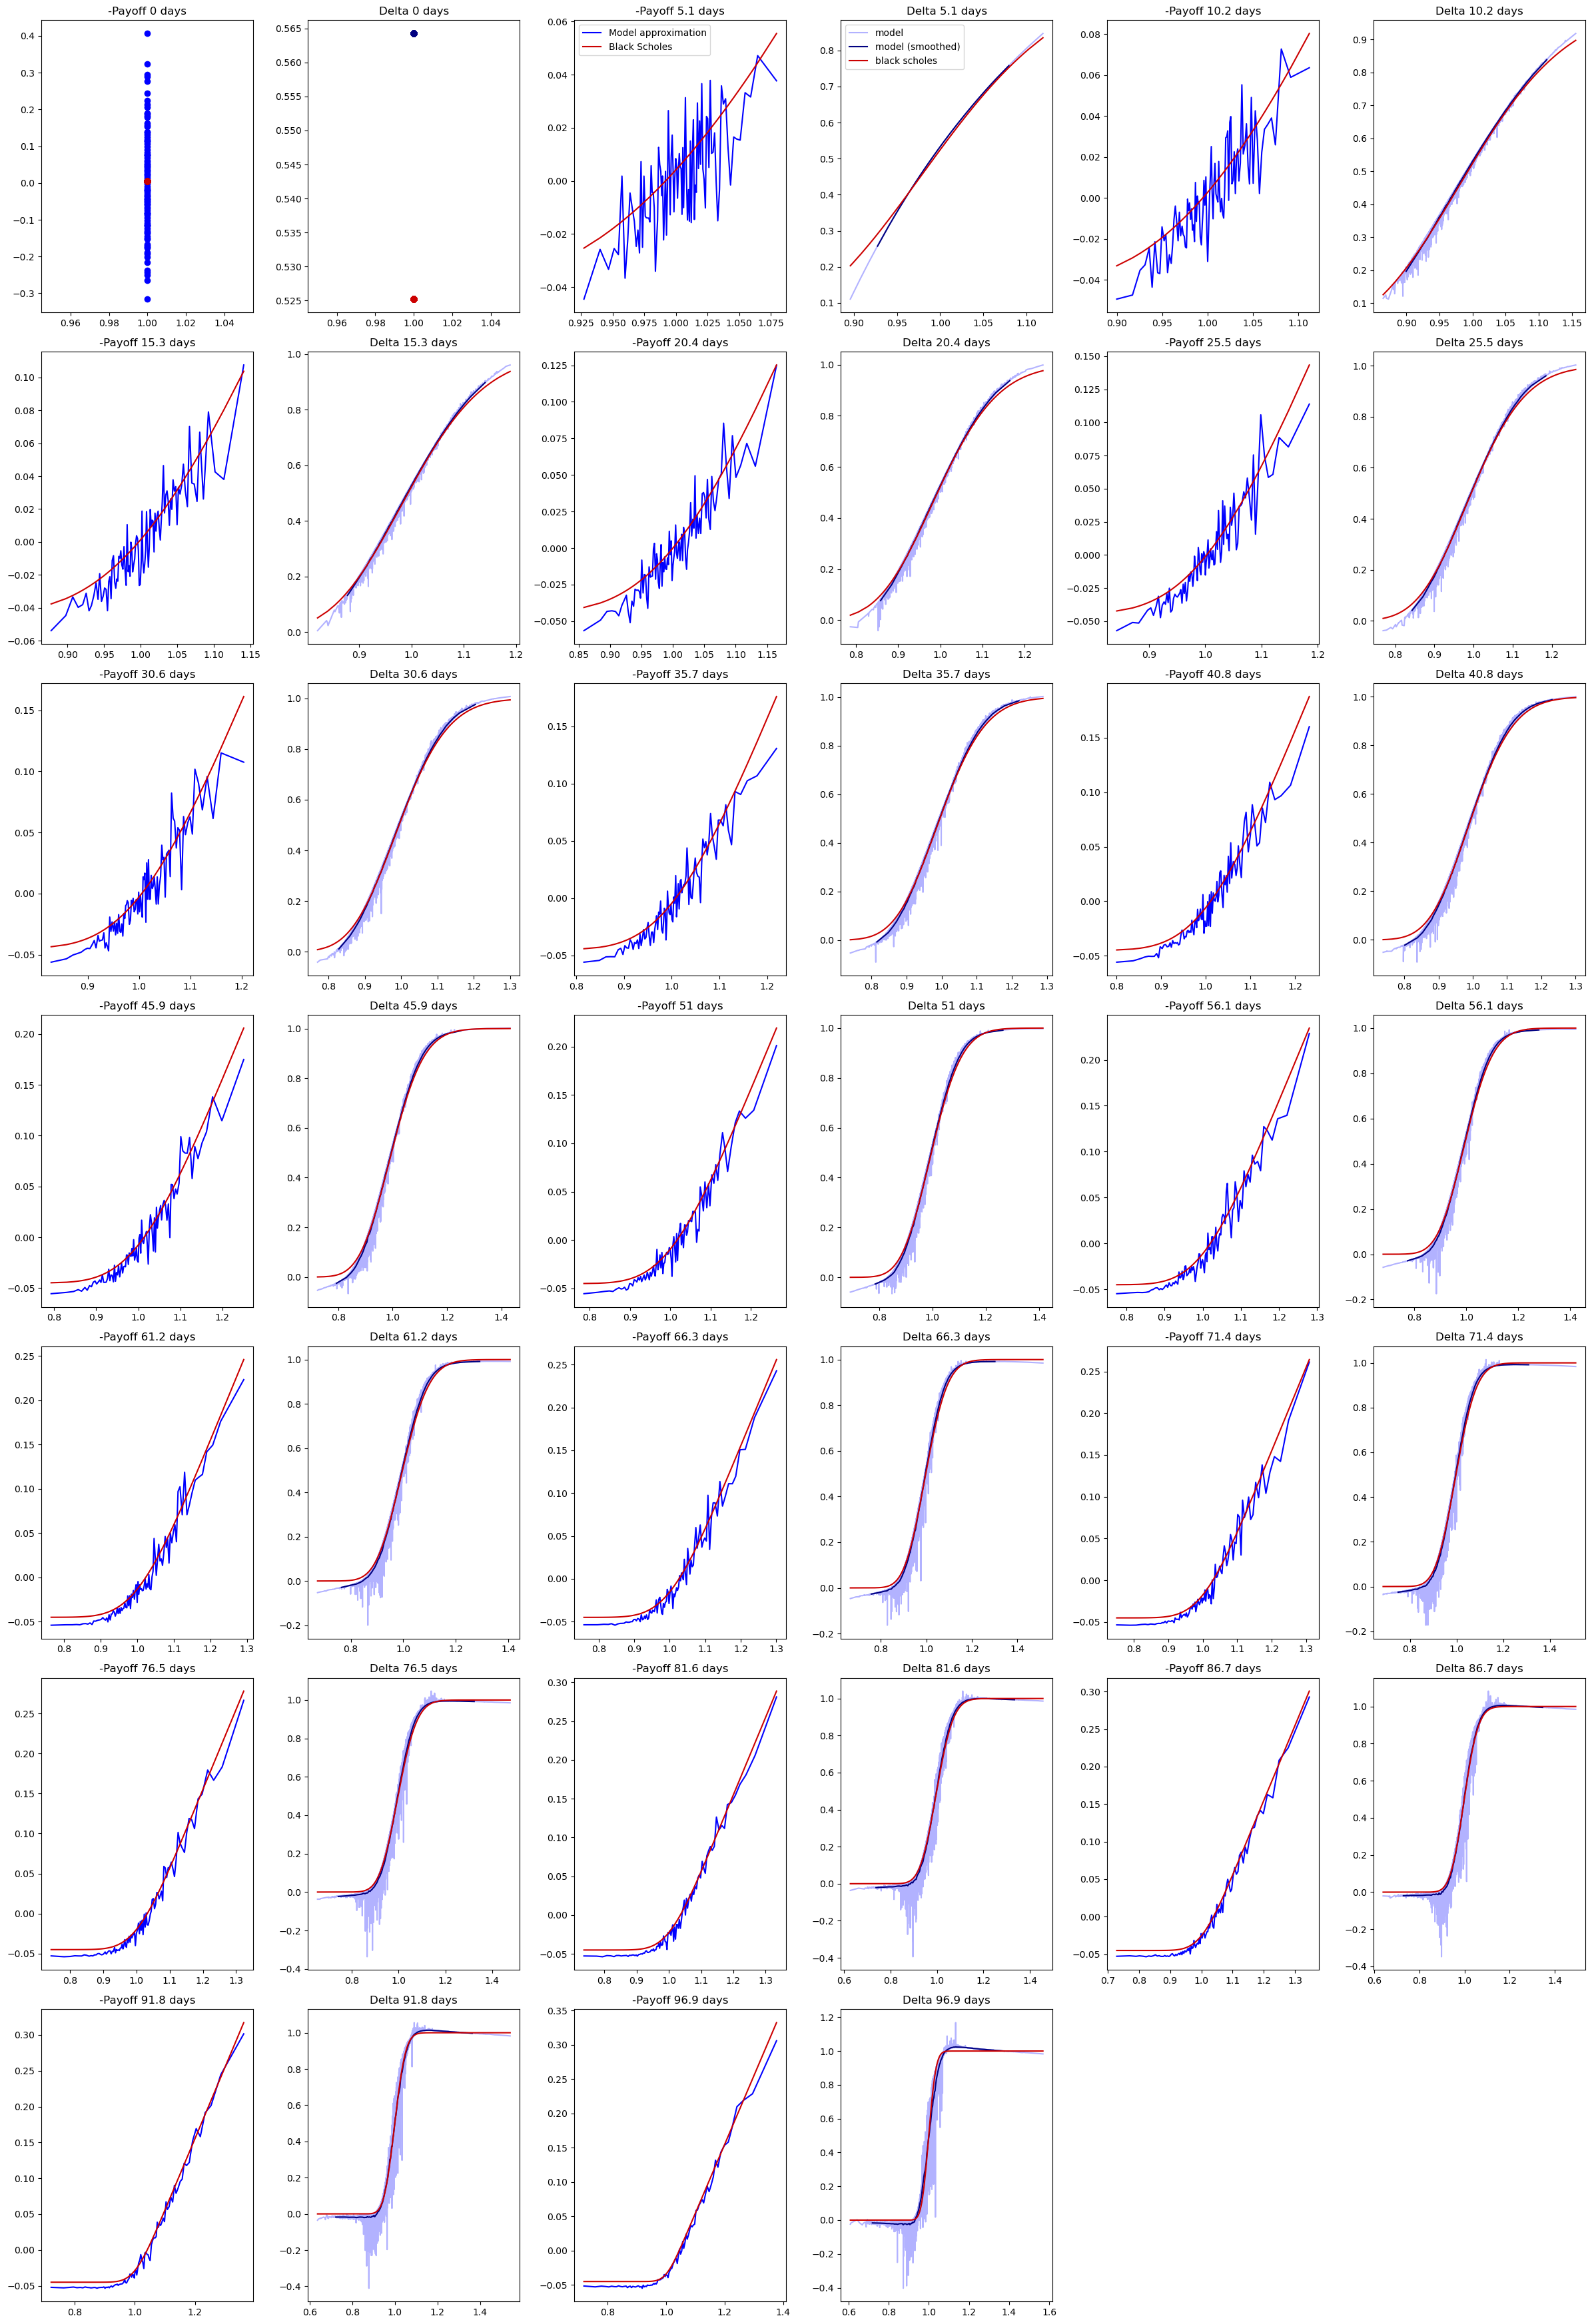

In [3]:
import deephedging.plot_bs_hedge as plot_bs_hedge
plot_bs_hedge.plot_blackscholes( world, gym, config )

## Stochastic Vol
### Trading with two assets

Deep Hedging AI says hello  ... 

## Deep Hedging in a simple Stochastic Volatility World

Initializing training at 2023-03-25 18:32:34: gym with 1006 trainable weights compiled. Took 4s
Agent is using 1004 weights: 1002 for the main agent per step, 2 for initial delta.
 Features available per time step:     action, call_delta, call_price, call_vega, cost, cost_v, delta, ivol, lbnd_a, pnl, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used per time step:          delta, price and time_left
 Features available for initial delta: call_delta, call_price, call_vega, cost, cost_v, ivol, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used by initial delta:       -
Monetary utility cvar@1 is using 1 weight
 Features available: call_delta, call_price, call_vega, cost, cost_v, ivol, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used:      -
Caching enabled @ '/home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/e63c8e053fd409630ac2979b40e1f86e946e6bc96482167f.pck'
Cache successfully loaded. Current epoch: 1
Trainin

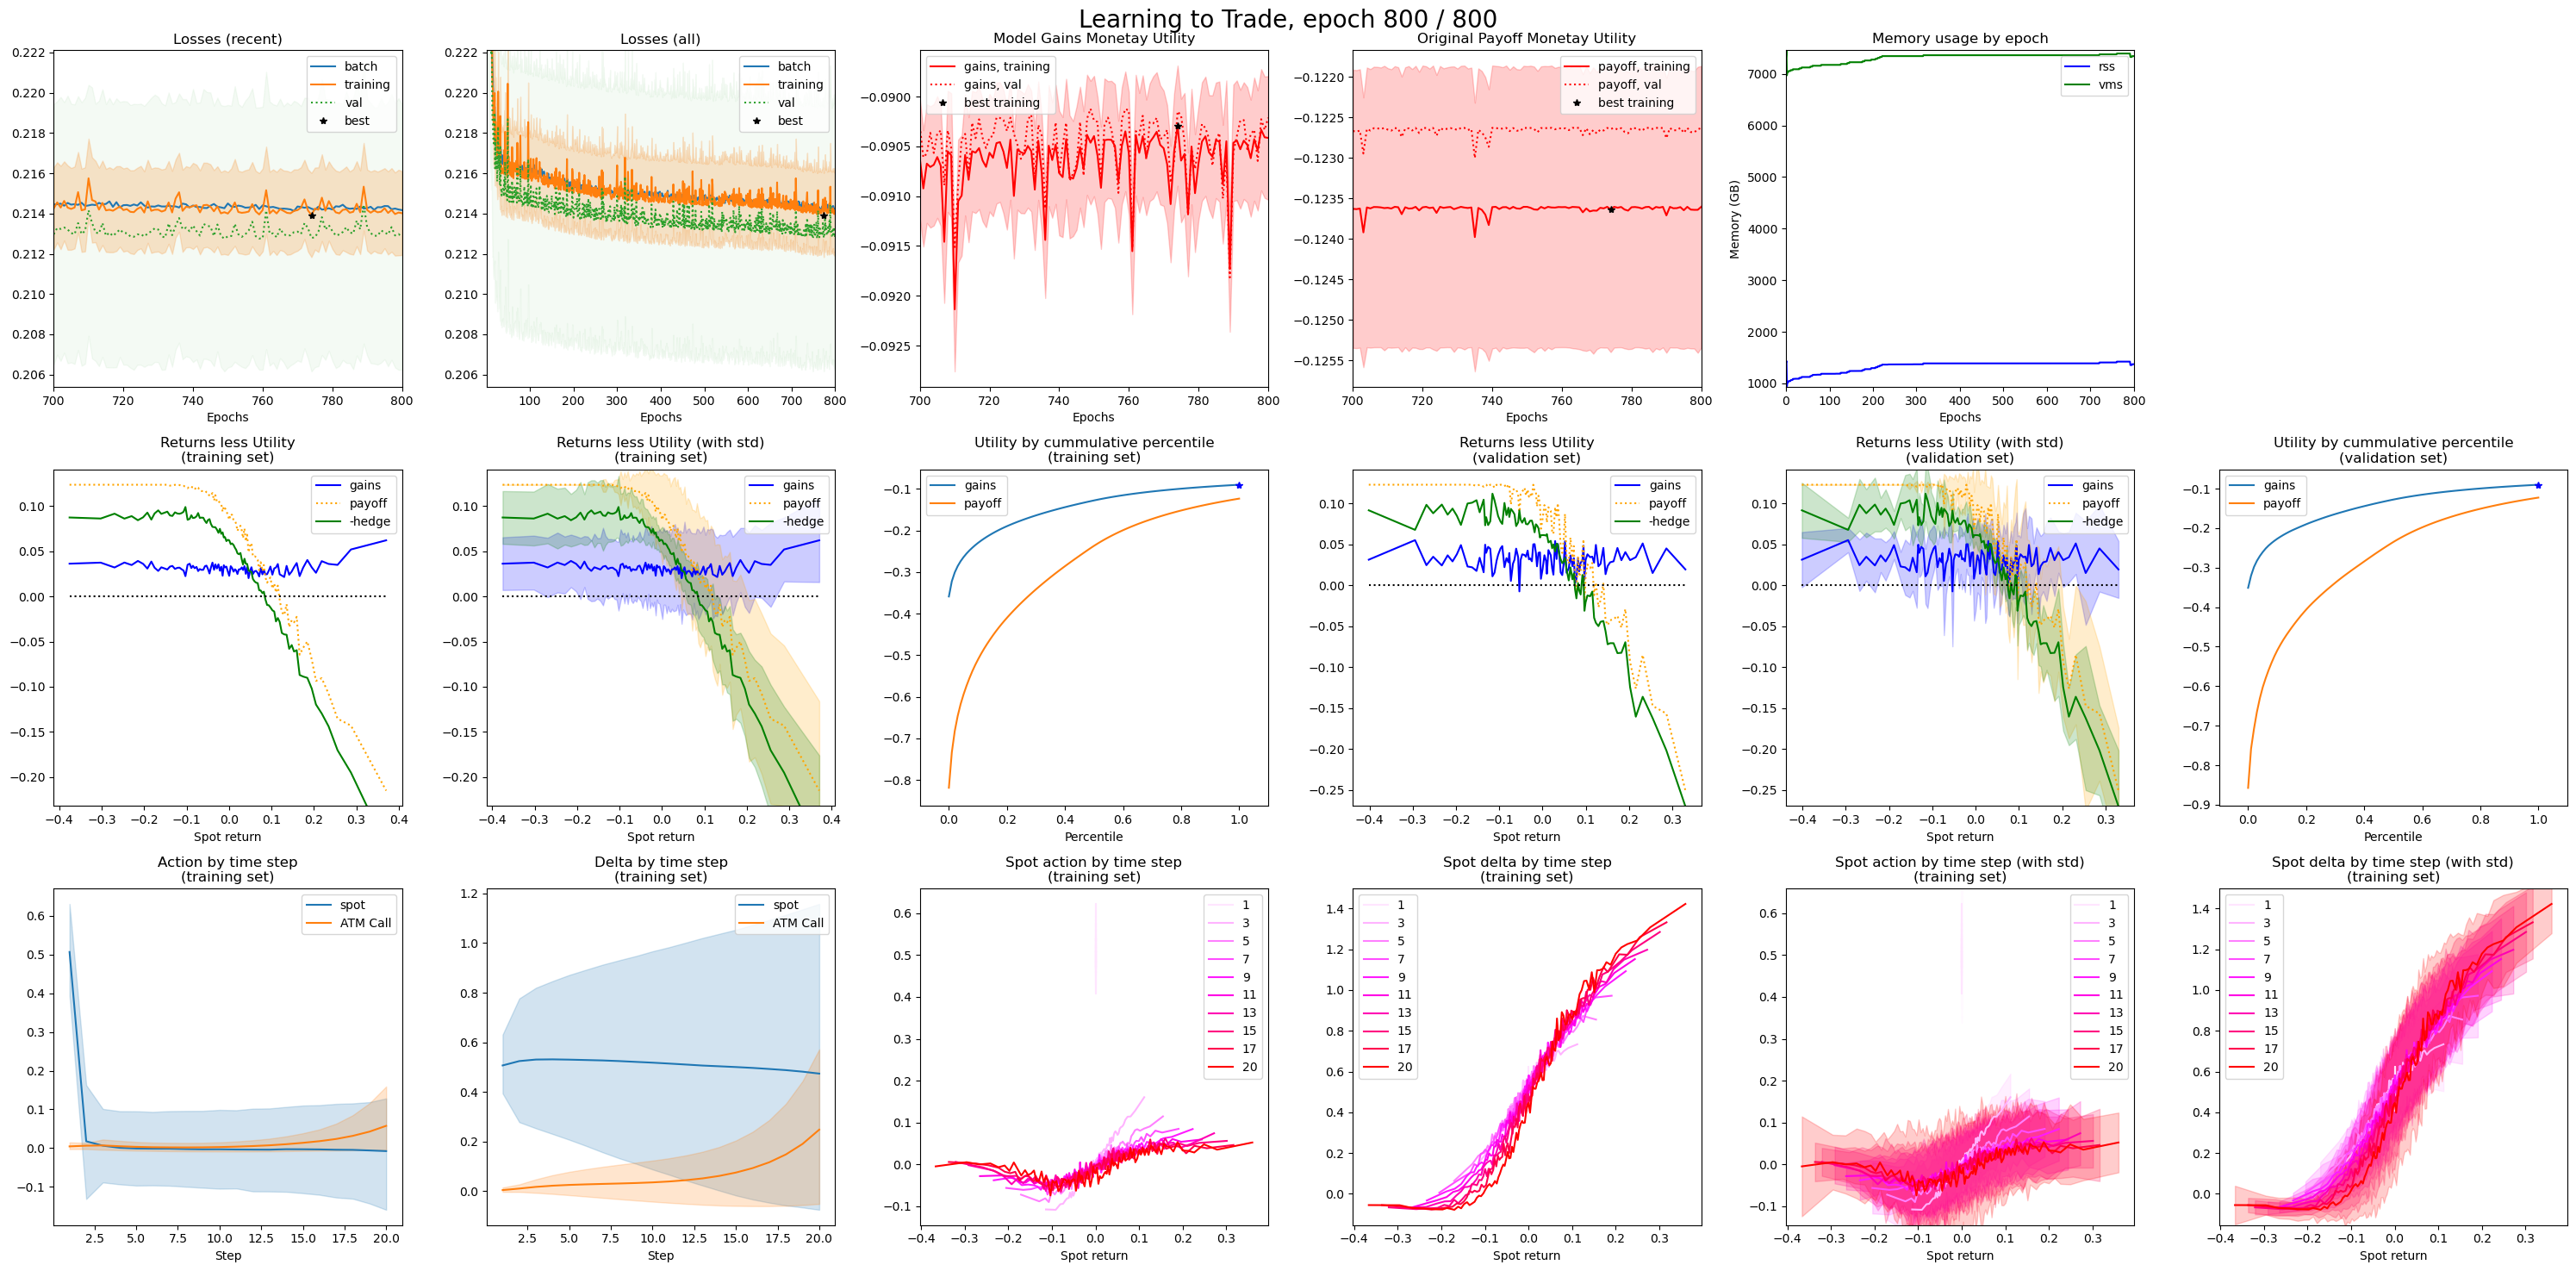

Training 800/800 epochs; 1006 weights; 10000 samples; 1000 validation samples batch size 32 | initial loss 1.12784 (0.0148342), training 0.214018 (0.00207901), best 0.213926 (0.0148342), batch 0.21417, val 0.212841 (0.00659794); best epoch 774, last cached 800 | memory used: rss 1372.27M, vms 7345.18M | time elapsed 2:44:35; time per epoch 12s; estimated time remaining 0s | current time: 2023-03-25 21:17:03                        2023-03-25 21:16:55                            
 Status: Training complete.
 Weights set to best epoch: 774
 State of training until epoch 800 cached into /home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/e63c8e053fd409630ac2979b40e1f86e946e6bc96482167f.pck
 Time: 2023-03-25 21:17:06
Training terminated. Total time taken 2:44:32
Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions'])
Config usage report
config.gym.agent.init_delta.network['activation'] = relu # Networ

In [ ]:
print("Deep Hedging AI says hello  ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM
import tensorflow as tf

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = False
# gym
config.gym.objective.utility = "cvar"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.optimizer.name = "adam"
config.trainer.train.optimizer.learning_rate = 0.001
config.trainer.train.optimizer.clipvalue = 1.
config.trainer.train.optimizer.global_clipnorm = 1.
config.trainer.train.batch_size = None
config.trainer.train.epochs = 800
config.trainer.caching.mode = "on"
config.trainer.train.run_eagerly = None
config.trainer.visual.epoch_refresh = 5
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in a simple Stochastic Volatility World"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=world.nSamples//10)

# create training environment
tf.debugging.enable_check_numerics()
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()